# Resultados

## Modelo de clasificación Binaria 

Found 1732 images belonging to 2 classes.


/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step
              precision    recall  f1-score   support

     Clase 0       0.95      0.93      0.94      1017
     Clase 1       0.90      0.93      0.92       715

    accuracy                           0.93      1732
   macro avg       0.93      0.93      0.93      1732
weighted avg       0.93      0.93      0.93      1732



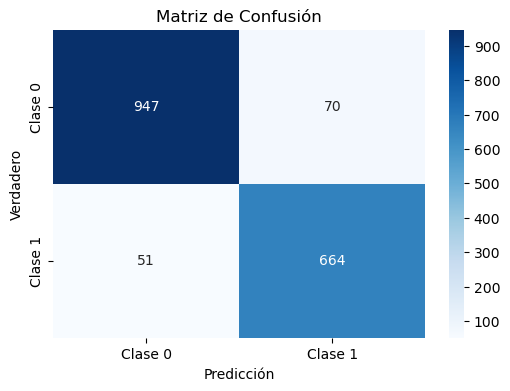

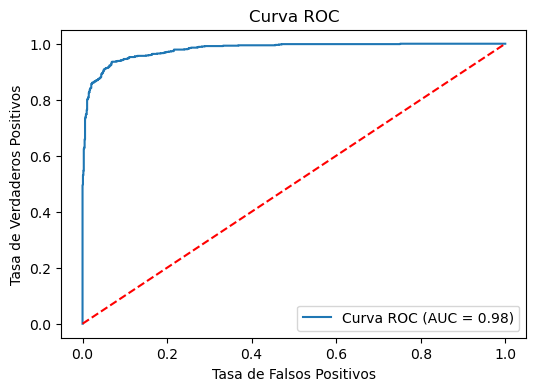

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_2clases = load_model('modelosFinales/xception_clasificacion2clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_2classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_2clases.predict(test_generator)

# Convertir probabilidades a etiquetas binarias
y_pred = (y_pred_proba > 0.8).astype(int)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Calcular las métricas de evaluación
print(classification_report(y_true, y_pred, target_names=['Clase 0', 'Clase 1']))

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convertir probabilidades a etiquetas binarias con un umbral específico
y_pred = (y_pred_proba > 0.8).astype(int)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Calcular Accuracy, Precision, Recall y F1-Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = cm.ravel()

# Calcular el False Negative Rate (FNR)
fnr = FN / (FN + TP)

print(f'False Negative Rate (FNR): {fnr}')

Accuracy: 0.9301
Precision: 0.9046
Recall: 0.9287
F1-Score: 0.9165
False Negative Rate (FNR): 0.07132867132867132


## Modelo de clasificación 3 clases 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_3clases = load_model('modelosFinales/xception_clasificacion3clases_aug.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_5classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_3clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Corregir las etiquetas verdaderas para alinear con y_pred
y_true_corrected = np.array([y for _, y in sorted(zip(test_generator.filenames, y_true))])

# Calcular las métricas de evaluación
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase con el mejor threshold
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

## Modelo de clasificación 5 clases 

Found 715 images belonging to 5 classes.


/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step
              precision    recall  f1-score   support

       ASC-H       0.84      0.86      0.85       139
      ASC-US       0.71      0.62      0.66        91
        HSIL       0.89      0.91      0.90       256
        LSIL       0.81      0.83      0.82       204
         SCC       0.73      0.64      0.68        25

    accuracy                           0.83       715
   macro avg       0.79      0.77      0.78       715
weighted avg       0.83      0.83      0.83       715



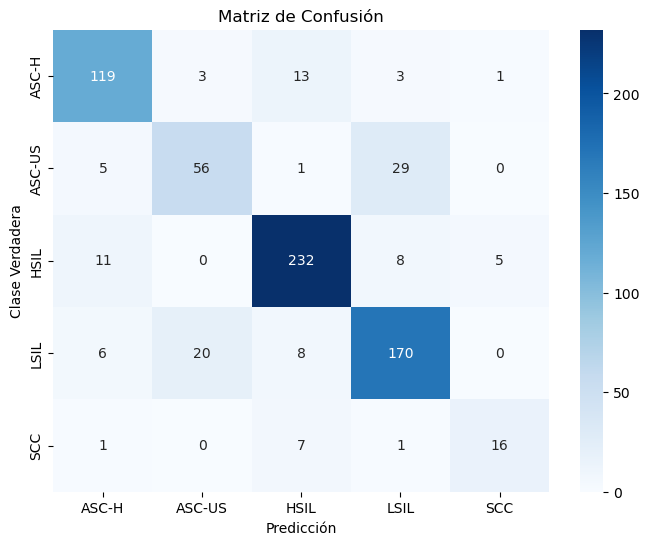

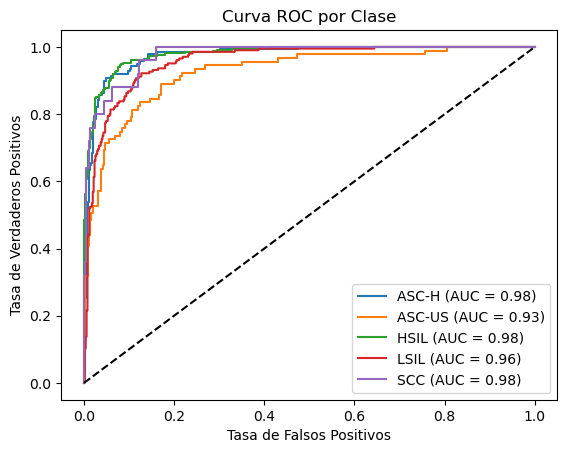

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_5clases = load_model('modelosFinales/xception_clasificacion5clases_augx2.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_5classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_5clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Corregir las etiquetas verdaderas para alinear con y_pred
y_true_corrected = np.array([y for _, y in sorted(zip(test_generator.filenames, y_true))])

# Calcular las métricas de evaluación
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase con el mejor threshold
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Labels are not in one-hot encoded format.
Accuracy: 0.8294
Precision: 0.7937
Recall: 0.7702
F1-Score: 0.7807


## Modelo de clasificación 6 clases

Found 1732 images belonging to 6 classes.
55/55 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step
              precision    recall  f1-score   support

       ASC-H       0.68      0.81      0.74       139
      ASC-US       0.50      0.41      0.45        91
        HSIL       0.82      0.85      0.83       256
        LSIL       0.62      0.71      0.66       204
    Negative       0.95      0.89      0.92      1017
         SCC       0.51      0.72      0.60        25

    accuracy                           0.83      1732
   macro avg       0.68      0.73      0.70      1732
weighted avg       0.84      0.83      0.83      1732



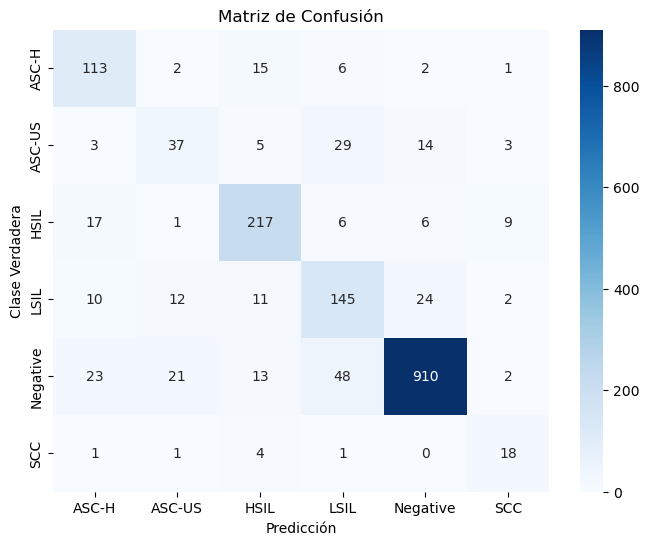

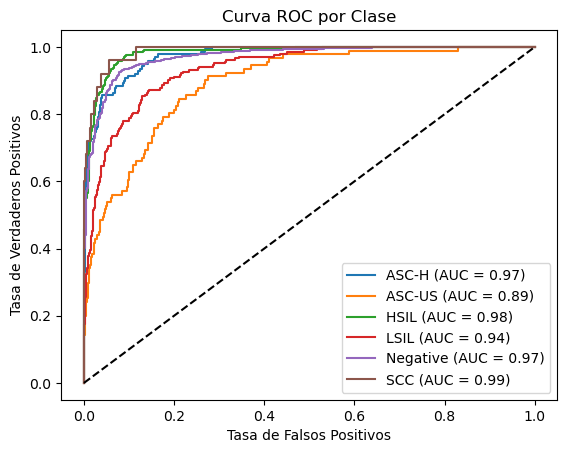

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_6clases = load_model('modelosFinales/xception_clasificacion6clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_6classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_6clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Corregir las etiquetas verdaderas para alinear con y_pred
y_true_corrected = np.array([y for _, y in sorted(zip(test_generator.filenames, y_true))])

# Calcular las métricas de evaluación
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase con el mejor threshold
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Labels are not in one-hot encoded format.
Accuracy: 0.8314
Precision: 0.6798
Recall: 0.7321
F1-Score: 0.7005


## Clasificación Binario -> Clasificación 5 Clases

Found 1732 images belonging to 2 classes.


/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step


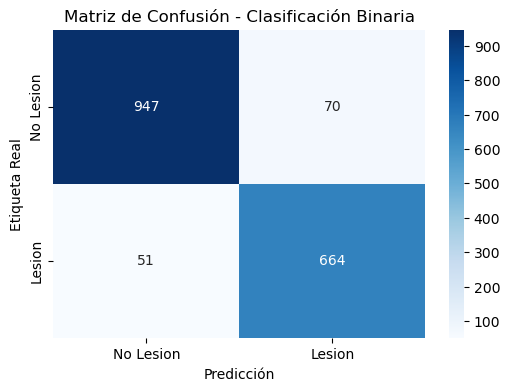

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

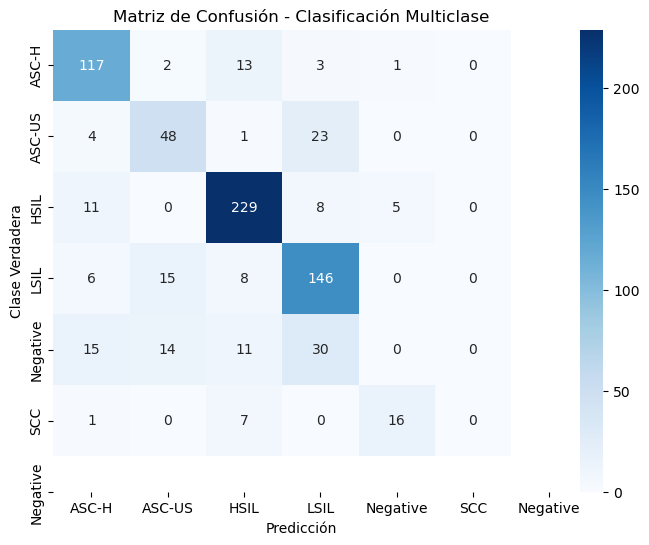

In [58]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar modelos
binary_model = tf.keras.models.load_model('modelosFinales/xception_clasificacion2clases.keras', compile=False)
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])


five_classes_model = tf.keras.models.load_model('modelosFinales/xception_clasificacion5clases_augx2.keras', custom_objects={'Functional': tf.keras.models.Model}, compile=False)
five_classes_model.compile(optimizer=Adam(learning_rate=1e-4),
            loss='categorical_crossentropy',  # Pérdida para multiclase
            metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

# Directorio de prueba
test_dir = 'crops/test'

# Configuración del generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    classes=['0_no_lesion', '1_lesion']
)

# Paso 1: Evaluar y clasificar usando el modelo binario
binary_predictions = (binary_model.predict(test_generator) > 0.8).astype(int).flatten()
y_true_binary = test_generator.classes


# Matriz de confusión
cm = confusion_matrix(y_true_binary, binary_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lesion', 'Lesion'], yticklabels=['No Lesion', 'Lesion'])
plt.title('Matriz de Confusión - Clasificación Binaria')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

# Crear un DataFrame para almacenar las predicciones y las rutas de archivos
binary_results_df = pd.DataFrame({
    'filepath': test_generator.filepaths,
    'true_label': y_true_binary,
    'predicted_label': binary_predictions
})

# Filtrar imágenes clasificadas como "Lesión" por el modelo binario para pasar al modelo multiclase
lesion_image_paths = binary_results_df[binary_results_df['predicted_label'] == 1]['filepath'].values

# ----------------------------------------------------------------------------------------------------------------------------

# Paso 2: Clasificar imágenes de "lesión" con el modelo de 5 clases

# Preparación para evaluación multiclase
y_true_multi = []
y_pred_multi = []

# Configurar la dimensión esperada del modelo multiclase
IMG_HEIGHT_MULTI, IMG_WIDTH_MULTI = 224, 224  # Asegurarse de que coincida con la configuración del modelo
lesion_classes = class_labels + ['Negative'] # Ajusta estas clases según tu modelo

# Paso 2: Evaluación multiclase con las imágenes clasificadas como "lesión"
for img_path in lesion_image_paths:
    # Obtener la clase verdadera desde el path de la imagen
    true_class_name = os.path.basename(os.path.dirname(img_path))

    # Procesar la imagen para el modelo de 5 clases
    img_multi = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_HEIGHT_MULTI, IMG_WIDTH_MULTI))
    img_array_multi = tf.keras.preprocessing.image.img_to_array(img_multi)
    img_array_multi = np.expand_dims(img_array_multi, axis=0) / 255.0

    # Realizar la predicción y almacenar los resultados
    multi_class_pred = five_classes_model.predict(img_array_multi)
    predicted_class = np.argmax(multi_class_pred, axis=1)[0]

    # Obtener el índice de la clase verdadera en `lesion_classes`
    true_class_index = lesion_classes.index(true_class_name)  # Busca el índice en la lista `lesion_classes`
    y_true_multi.append(true_class_index)
    y_pred_multi.append(predicted_class)

# Crear la matriz de confusión segundo paso
cm = confusion_matrix(y_true_multi, y_pred_multi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_classes, yticklabels=lesion_classes)
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión - Clasificación Multiclase')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

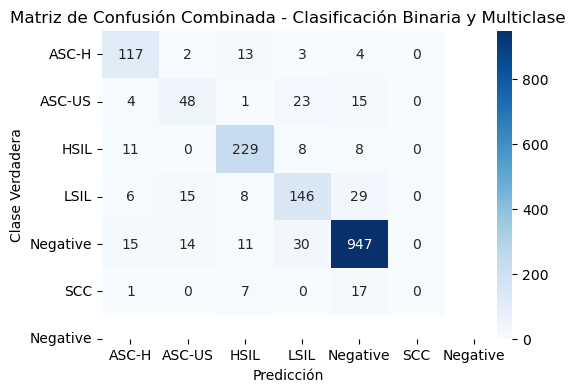

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lesion_classes = class_labels + ['Negative']

# Dividir en dos grupos: imágenes clasificadas como "Lesión" (1) y "No Lesión" (0)
lesion_indices = np.where(binary_predictions == 1)[0]
no_lesion_indices = np.where(binary_predictions == 0)[0]

# Preparar listas para las etiquetas verdaderas y predichas en la matriz de confusión combinada
y_true_combined = []
y_pred_combined = []

# Paso 1: Clasificar imágenes de "Lesión" con el modelo de 5 clases
for i in lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))  # Obtener clase verdadera desde el path
    true_class_index = lesion_classes.index(true_class_name)  # Índice de la clase verdadera

    # Procesar la imagen para el modelo multiclase
    img_multi = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array_multi = tf.keras.preprocessing.image.img_to_array(img_multi)
    img_array_multi = np.expand_dims(img_array_multi, axis=0) / 255.0

    # Realizar la predicción con el modelo de 5 clases
    multi_class_pred = five_classes_model.predict(img_array_multi)
    predicted_class = np.argmax(multi_class_pred, axis=1)[0]

    # Agregar a la lista de etiquetas combinadas
    y_true_combined.append(true_class_index)
    y_pred_combined.append(predicted_class)

# Paso 2: Asignar los verdaderos negativos y falsos negativos
for i in no_lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))
    if true_class_name == "Negative":
        # Verdadero negativo: era "Negative" y el modelo lo clasificó como "Negative"
        y_true_combined.append(lesion_classes.index("Negative"))
        y_pred_combined.append(lesion_classes.index("Negative"))
    else:
        # Falso negativo: era una lesión, pero se clasificó como "Negative" en la primera etapa
        true_class_index = lesion_classes.index(true_class_name)
        y_true_combined.append(true_class_index)
        y_pred_combined.append(lesion_classes.index("Negative"))

# Crear y visualizar la matriz de confusión combinada
cm_combined = confusion_matrix(y_true_combined, y_pred_combined)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_classes, yticklabels=lesion_classes) 
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión Combinada - Clasificación Binaria y Multiclase')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

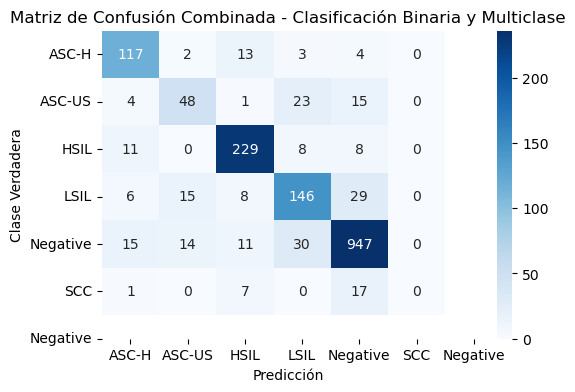

In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lesion_classes = class_labels + ['Negative']

# Dividir en dos grupos: imágenes clasificadas como "Lesión" (1) y "No Lesión" (0)
lesion_indices = np.where(binary_predictions == 1)[0]
no_lesion_indices = np.where(binary_predictions == 0)[0]

# Preparar listas para las etiquetas verdaderas y predichas en la matriz de confusión combinada
y_true_combined = []
y_pred_combined = []

# Paso 1: Clasificar imágenes de "Lesión" con el modelo de 5 clases
for i in lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))  # Obtener clase verdadera desde el path
    true_class_index = lesion_classes.index(true_class_name)  # Índice de la clase verdadera

    # Procesar la imagen para el modelo multiclase
    img_multi = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array_multi = tf.keras.preprocessing.image.img_to_array(img_multi)
    img_array_multi = np.expand_dims(img_array_multi, axis=0) / 255.0

    # Realizar la predicción con el modelo de 5 clases
    multi_class_pred = five_classes_model.predict(img_array_multi)
    predicted_class = np.argmax(multi_class_pred, axis=1)[0]

    # Agregar a la lista de etiquetas combinadas
    y_true_combined.append(true_class_index)
    y_pred_combined.append(predicted_class)

# Paso 2: Asignar los verdaderos negativos y falsos negativos
for i in no_lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))
    if true_class_name == "Negative":
        # Verdadero negativo: era "Negative" y el modelo lo clasificó como "Negat
        # ive"
        y_true_combined.append(lesion_classes.index("Negative"))
        y_pred_combined.append(lesion_classes.index("Negative"))
    else:
        # Falso negativo: era una lesión, pero se clasificó como "Negative" en la primera etapa
        true_class_index = lesion_classes.index(true_class_name)
        y_true_combined.append(true_class_index)
        y_pred_combined.append(lesion_classes.index("Negative"))

# Crear y visualizar la matriz de confusión combinada
cm_combined = confusion_matrix(y_true_combined, y_pred_combined)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_classes, yticklabels=lesion_classes, 
            vmax=np.max(cm_combined) // 4) 
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión Combinada - Clasificación Binaria y Multiclase')
plt.show()


In [64]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc, classification_report
import pandas as pd

# Define lesion classes
lesion_classes = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC', 'Negative']

# Convert true labels to one-hot encoding for ROC calculation
num_classes = len(lesion_classes)
y_true_combined_one_hot = tf.keras.utils.to_categorical(y_true_combined, num_classes=num_classes)

# Prepare probabilities for each class in `y_pred_combined`
y_pred_combined_proba = np.zeros((len(y_pred_combined), num_classes))
for i, pred in enumerate(y_pred_combined):
    y_pred_combined_proba[i, pred] = 1

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_combined_one_hot[:, i], y_pred_combined_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Generate Classification Report
report = classification_report(y_true_combined, y_pred_combined, target_names=lesion_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Format all numeric columns in report_df to two decimal places
report_df = report_df.copy()
report_df[['precision', 'recall', 'f1-score']] = report_df[['precision', 'recall', 'f1-score']].applymap(lambda x: f"{x:.2f}")
report_df['support'] = report_df['support'].astype(int)  # Ensure 'support' column has no decimals



from tabulate import tabulate

# Display the Classification Report
print("Multi-Class Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='pretty', showindex=True))


Multi-Class Classification Report:
+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|    ASC-H     |   0.76    |  0.84  |   0.80   |   139   |
|    ASC-US    |   0.61    |  0.53  |   0.56   |   91    |
|     HSIL     |   0.85    |  0.89  |   0.87   |   256   |
|     LSIL     |   0.70    |  0.72  |   0.71   |   204   |
|     SCC      |   0.93    |  0.93  |   0.93   |  1017   |
|   Negative   |   0.00    |  0.00  |   0.00   |   25    |
|   accuracy   |   0.86    |  0.86  |   0.86   |    0    |
|  macro avg   |   0.64    |  0.65  |   0.65   |  1732   |
| weighted avg |   0.85    |  0.86  |   0.85   |  1732   |
+--------------+-----------+--------+----------+---------+


/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,